In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import learning_curve
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import cv2



In [ ]:
df = pd.read_csv("../Car_Images_metadata_fixed.csv")

In [52]:
df.head()

image_path  label brand model  year  \
0  C:\Users\youss\OneDrive\Desktop\ML for me\trai...  Stock   BMW  328i  2013   
1  C:\Users\youss\OneDrive\Desktop\ML for me\trai...  Stock   BMW  328i  2013   
2  C:\Users\youss\OneDrive\Desktop\ML for me\trai...  Stock   BMW  328i  2013   
3  C:\Users\youss\OneDrive\Desktop\ML for me\trai...  Stock   BMW  328i  2013   
4  C:\Users\youss\OneDrive\Desktop\ML for me\trai...  Stock   BMW  328i  2013   

                                 filename  L_real_m  W_real_m  H_real_m  \
0  BMW_328i_2013_Stock_1763816756457.jpeg       4.5       1.8       1.4   
1  BMW_328i_2013_Stock_1763816770582.jpeg       4.5       1.8       1.4   
2  BMW_328i_2013_Stock_1763816784068.jpeg       4.5       1.8       1.4   
3  BMW_328i_2013_Stock_1763816795763.jpeg       4.5       1.8       1.4   
4  BMW_328i_2013_Stock_1763816805646.jpeg       4.5       1.8       1.4   

   WB_real_m  Noise_Level_dB  
0        2.7           77.66  
1        2.7           77.66  
2        2.7           77.66  
3        2.7           77.66  
4        2.7           77.66

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image_path      3533 non-null   object 
 1   label           3533 non-null   object 
 2   brand           3533 non-null   object 
 3   model           3533 non-null   object 
 4   year            3533 non-null   int64  
 5   filename        3533 non-null   object 
 6   L_real_m        3533 non-null   float64
 7   W_real_m        3533 non-null   float64
 8   H_real_m        3533 non-null   float64
 9   WB_real_m       3533 non-null   float64
 10  Noise_Level_dB  3533 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 303.7+ KB


In [54]:
df = df.dropna()

In [55]:
df.shape

(3533, 11)

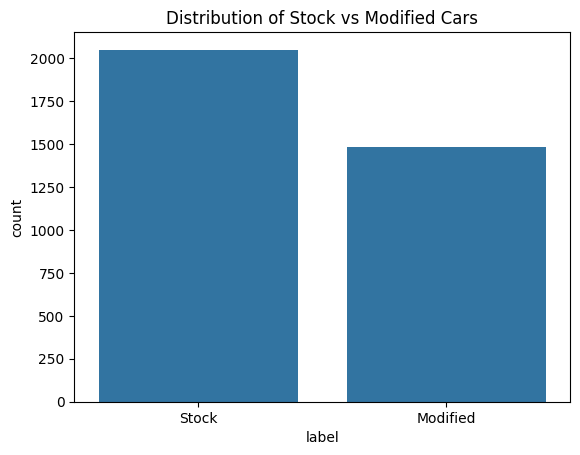

In [56]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Stock vs Modified Cars')
plt.show()

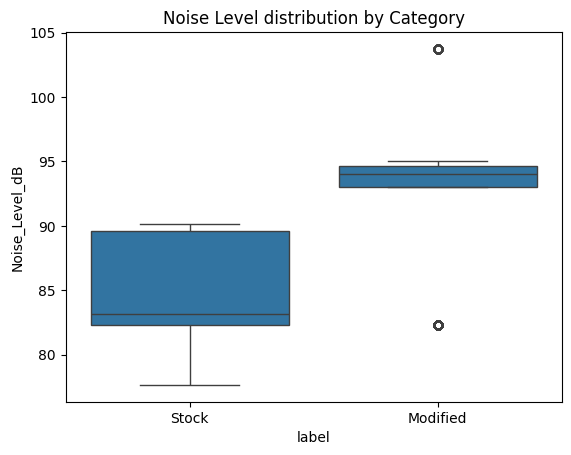

In [57]:
sns.boxplot(x='label', y='Noise_Level_dB', data=df)
plt.title('Noise Level distribution by Category')
plt.show()

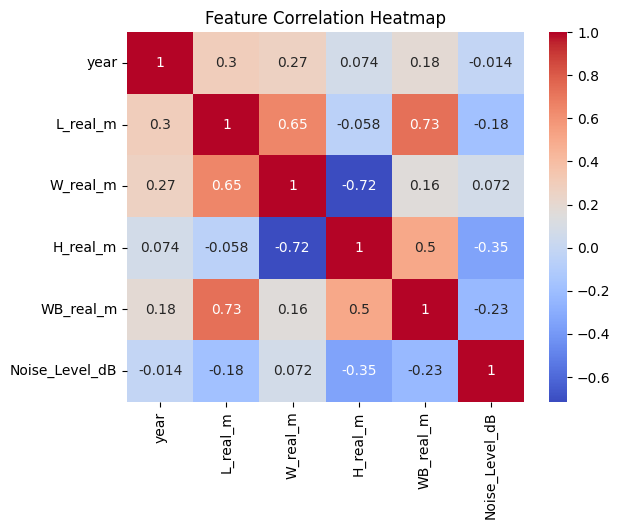

In [58]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [59]:
df['label'] = df['label'].map({'Stock': 0, 'Modified': 1})

In [60]:
df.head()

image_path  label brand model  year  \
0  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0   BMW  328i  2013   
1  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0   BMW  328i  2013   
2  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0   BMW  328i  2013   
3  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0   BMW  328i  2013   
4  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0   BMW  328i  2013   

                                 filename  L_real_m  W_real_m  H_real_m  \
0  BMW_328i_2013_Stock_1763816756457.jpeg       4.5       1.8       1.4   
1  BMW_328i_2013_Stock_1763816770582.jpeg       4.5       1.8       1.4   
2  BMW_328i_2013_Stock_1763816784068.jpeg       4.5       1.8       1.4   
3  BMW_328i_2013_Stock_1763816795763.jpeg       4.5       1.8       1.4   
4  BMW_328i_2013_Stock_1763816805646.jpeg       4.5       1.8       1.4   

   WB_real_m  Noise_Level_dB  
0        2.7           77.66  
1        2.7           77.66  
2        2.7           77.66  
3        2.7           77.66  
4        2.7           77.66

In [61]:
num_features = [
    'L_real_m', 'W_real_m', 'H_real_m',
    'WB_real_m', 'year'
]

cat_features = ['brand', 'model']


In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [63]:
X = df[num_features + cat_features]
y = df.label


In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [65]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [66]:
model_tabular = LogisticRegression(
    max_iter=10,
    C=1.0,
    solver='lbfgs'
)
model_tabular.fit(X_train, y_train)

c:\Users\youss\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [67]:
y_pred = model_tabular.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       297

    accuracy                           1.00       707
   macro avg       1.00      1.00      1.00       707
weighted avg       1.00      1.00      1.00       707



c:\Users\youss\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\youss\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 10 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refe

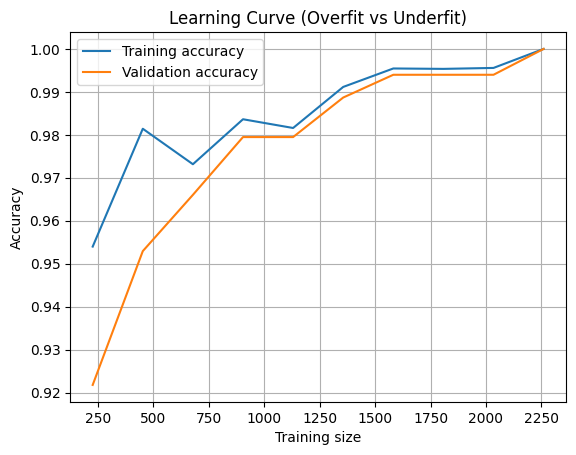

In [68]:
train_sizes, train_scores, val_scores = learning_curve(
    model_tabular,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.plot(train_sizes, val_mean, label='Validation accuracy')
plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Overfit vs Underfit)")
plt.legend()
plt.grid()
plt.show()


In [69]:
# Optional: Handle imbalance
#smote = SMOTE(random_state=42)
#X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [70]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [71]:
print(df[['image_path', 'label']].head())

                                          image_path  label
0  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0
1  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0
2  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0
3  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0
4  C:\Users\youss\OneDrive\Desktop\ML for me\trai...      0


In [72]:
images = []

# Iterate over the rows
for path in df['image_path']:
    # Read the image in color (BGR format, as cv2 does by default)
    img = cv2.imread(path)
    
    # Check if the image was loaded successfully
    if img is None:
        print(f"Warning: Could not load image at {path}")
        continue  # Skip bad paths
    
    # Resize to 224x224 (standard for many pre-trained models like VGG, ResNet, etc.)
    img = cv2.resize(img, (224, 224))
    
    # Append to list
    images.append(img)

In [73]:
X = np.array(images, dtype='float32') / 255.0
y = df['label'].values

In [74]:
print("X shape:", X.shape) 
print("y shape:", y.shape)  
print("Unique labels:", np.unique(y))  

X shape: (3533, 224, 224, 3)
y shape: (3533,)
Unique labels: [0 1]


In [75]:
# First split: 60% train, 40% temp
X_train_img , X_temp_img , y_train_img , y_temp_img = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Second split: split temp into 20% val + 20% test
X_val_img , X_test_img , y_val_img , y_test_img = train_test_split(
    X_temp_img, y_temp_img, test_size=0.5, random_state=42, stratify=y_temp_img
)

In [76]:
print("\n=== Split Sizes ===")
print(f"Train: {X_train_img.shape[0]} images ({X_train_img.shape[0]/len(X):.1%})")
print(f"Validation: {X_val_img.shape[0]} images ({X_val_img.shape[0]/len(X):.1%})")
print(f"Test: {X_test_img.shape[0]} images ({X_test_img.shape[0]/len(X):.1%})")


=== Split Sizes ===
Train: 2119 images (60.0%)
Validation: 707 images (20.0%)
Test: 707 images (20.0%)


In [77]:
def print_balance(name, y_set):
    unique, counts = np.unique(y_set, return_counts=True)
    total = len(y_set)
    print(f"{name}:")
    for label, count in zip(unique, counts):
        print(f"  Label {label} ({'Stock' if label==0 else 'Modified'}): {count} ({count/total:.1%})")

print("\n=== Class Distribution ===")
print_balance("Full dataset", y)
print_balance("Train", y_train_img)
print_balance("Validation", y_val_img)
print_balance("Test", y_test_img)


=== Class Distribution ===
Full dataset:
  Label 0 (Stock): 2049 (58.0%)
  Label 1 (Modified): 1484 (42.0%)
Train:
  Label 0 (Stock): 1229 (58.0%)
  Label 1 (Modified): 890 (42.0%)
Validation:
  Label 0 (Stock): 410 (58.0%)
  Label 1 (Modified): 297 (42.0%)
Test:
  Label 0 (Stock): 410 (58.0%)
  Label 1 (Modified): 297 (42.0%)


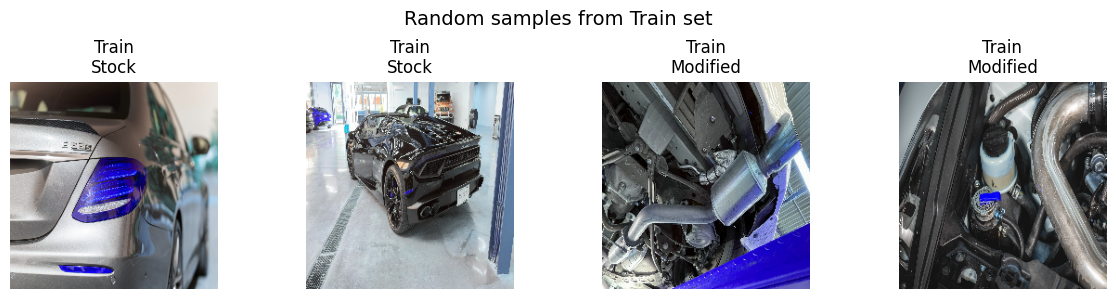

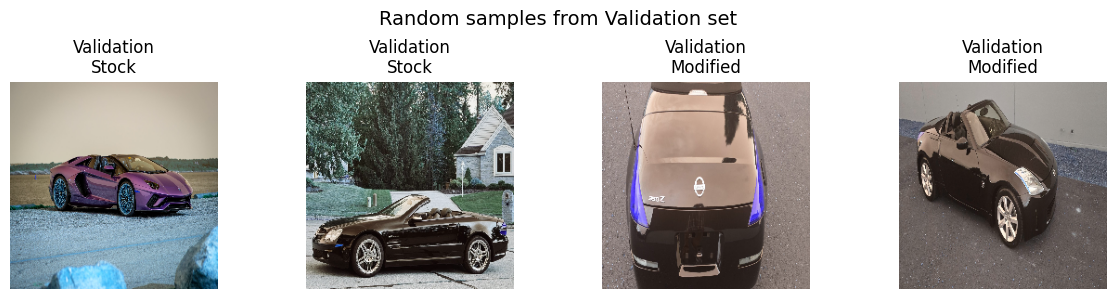

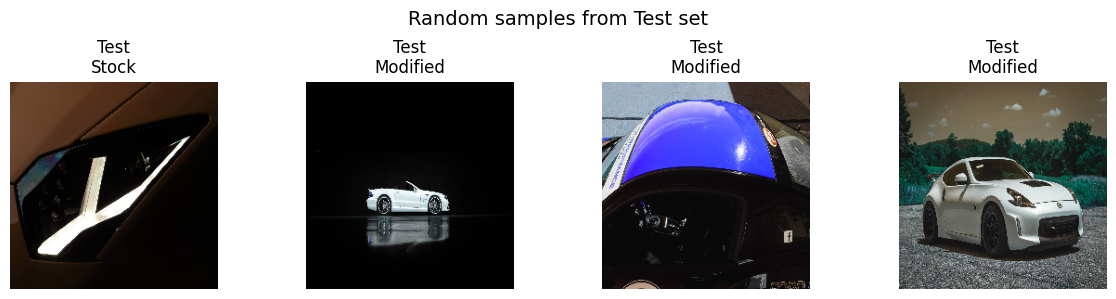

In [78]:
# === Step 4: Optional - Visualize random images from each split ===
def show_random_images(X_set, y_set, title, num=4):
    plt.figure(figsize=(12, 3))
    indices = np.random.choice(len(X_set), num, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num, i+1)
        plt.imshow(X_set[idx])
        label = "Stock" if y_set[idx] == 0 else "Modified"
        plt.title(f"{title}\n{label}")
        plt.axis('off')
    plt.suptitle(f"Random samples from {title} set", fontsize=14)
    plt.tight_layout()
    plt.show()

# Uncomment to visualize
show_random_images(X_train_img, y_train_img, "Train")
show_random_images(X_val_img, y_val_img, "Validation")
show_random_images(X_test_img, y_test_img, "Test")

In [79]:
#Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train_img)

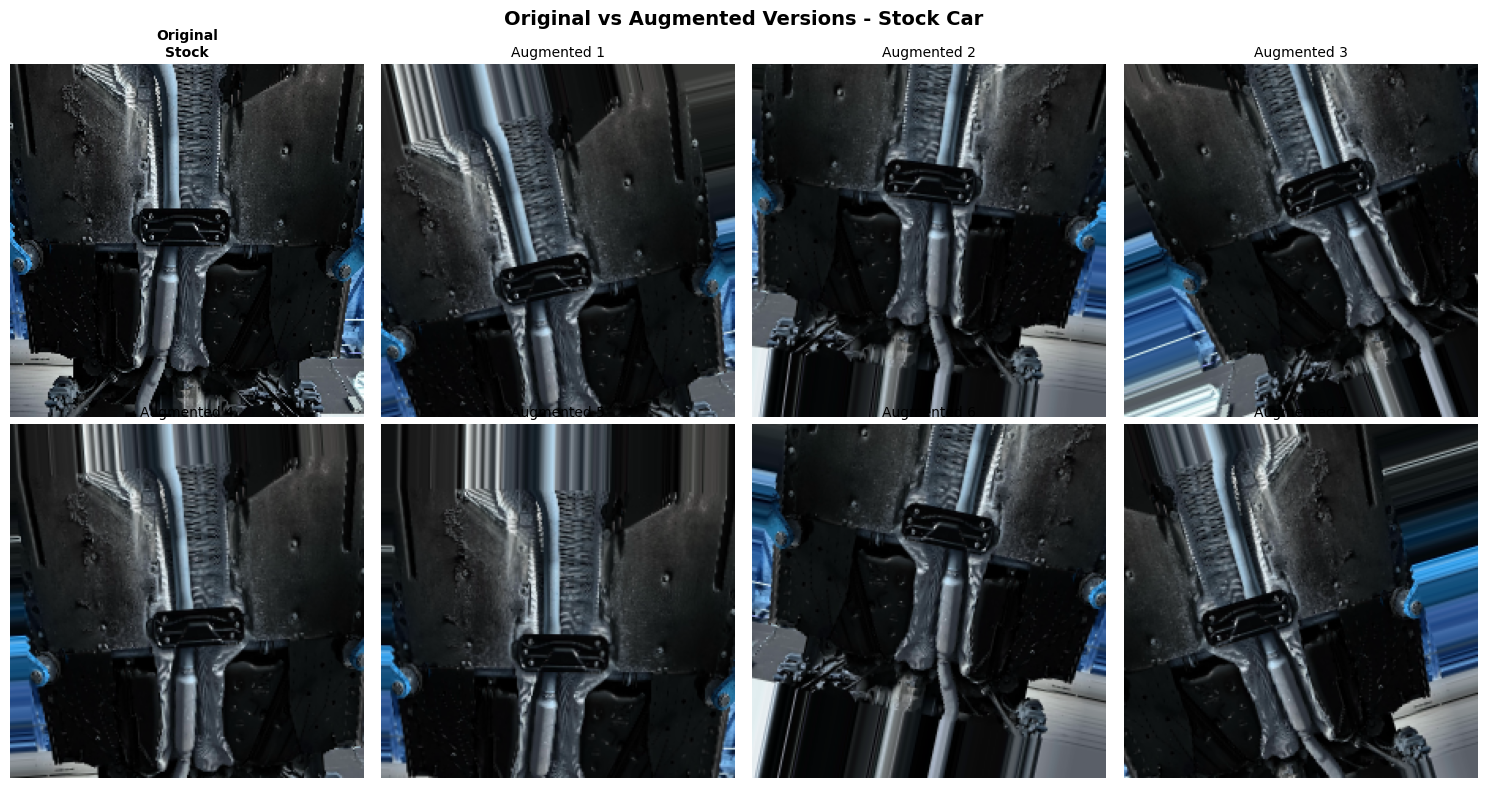

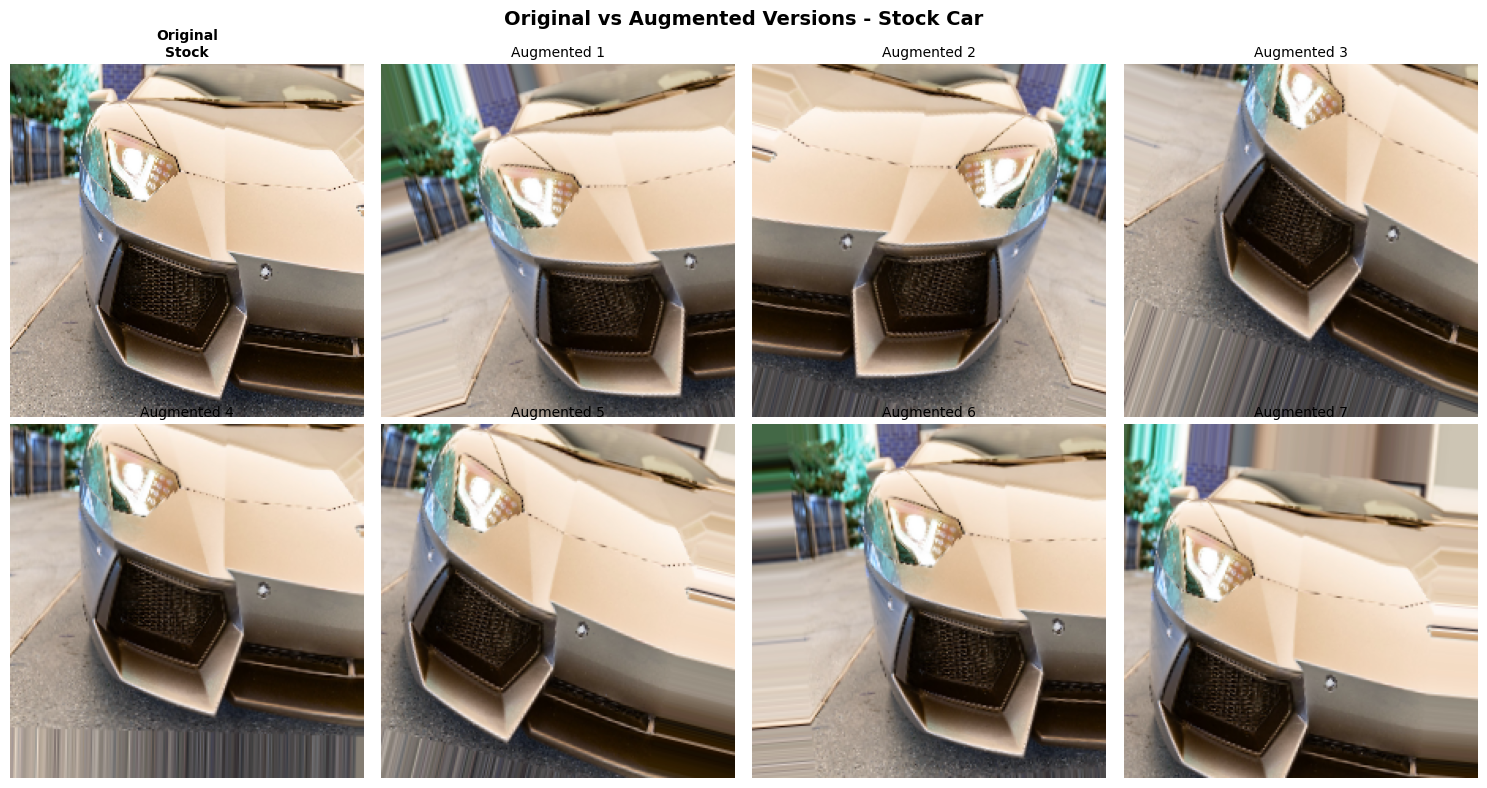

In [80]:
def show_augmented_images(X_set_img, y_set_img, datagen, num=4):
    """Show original vs multiple augmented versions"""
    plt.figure(figsize=(15, 8))
    
    # Pick one random image
    idx = np.random.randint(0, len(X_set_img))
    original_img = X_set_img[idx]
    label = "Stock" if y_set_img[idx] == 0 else "Modified"
    
    # Show original
    plt.subplot(2, 4, 1)
    plt.imshow(original_img)
    plt.title(f"Original\n{label}", fontsize=10, fontweight='bold')
    plt.axis('off')
    
    # Generate and show augmented versions
    img_reshaped = original_img.reshape((1,) + original_img.shape)
    
    aug_iter = datagen.flow(img_reshaped, batch_size=1)
    for i in range(7):
        aug_img = next(aug_iter)[0]
        plt.subplot(2, 4, i+2)
        plt.imshow(aug_img)
        plt.title(f"Augmented {i+1}", fontsize=10)
        plt.axis('off')
    
    plt.suptitle(f"Original vs Augmented Versions - {label} Car", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Show augmentation examples
show_augmented_images(X_train_img, y_train_img, datagen)
show_augmented_images(X_train_img, y_train_img, datagen)


=== Side-by-Side Comparison: Original vs Augmented ===


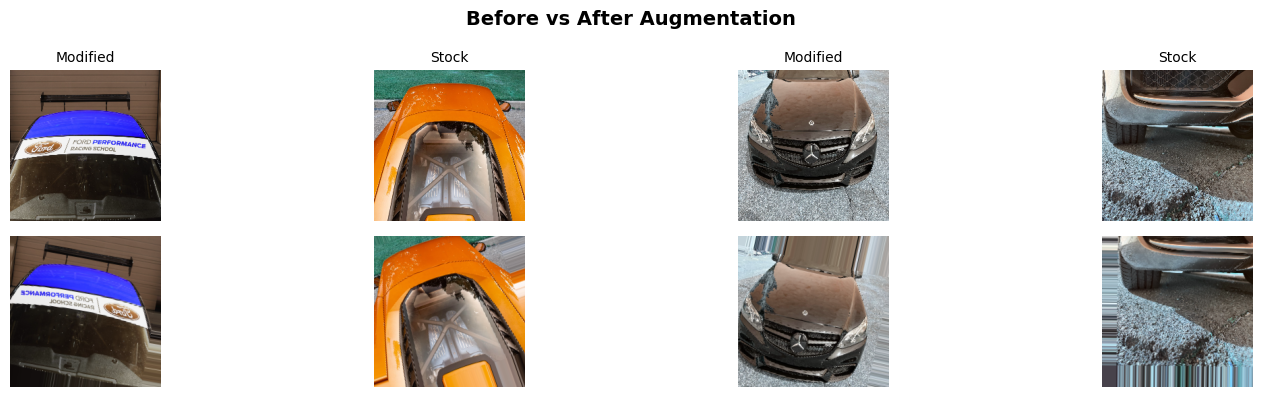

In [81]:
print("\n=== Side-by-Side Comparison: Original vs Augmented ===")

def show_before_after_grid(X_set_img, y_set_img, datagen, num_samples=4):
    """Show multiple samples with original and one augmented version side by side"""
    plt.figure(figsize=(16, 4))
    
    indices = np.random.choice(len(X_set_img), num_samples, replace=False)
    
    for i, idx in enumerate(indices):
        original_img = X_set_img[idx]
        label = "Stock" if y_set_img[idx] == 0 else "Modified"
        
        # Original image
        plt.subplot(2, num_samples, i+1)
        plt.imshow(original_img)
        if i == 0:
            plt.ylabel("Original", fontsize=12, fontweight='bold')
        plt.title(f"{label}", fontsize=10)
        plt.axis('off')
        
        # Augmented version
        img_reshaped = original_img.reshape((1,) + original_img.shape)
        aug_iter = datagen.flow(img_reshaped, batch_size=1)
        aug_img = next(aug_iter)[0]
        
        plt.subplot(2, num_samples, num_samples + i+1)
        plt.imshow(aug_img)
        if i == 0:
            plt.ylabel("Augmented", fontsize=12, fontweight='bold')
        plt.axis('off')
    
    plt.suptitle("Before vs After Augmentation", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

show_before_after_grid(X_train_img, y_train_img, datagen, num_samples=4)


In [82]:
# Build CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Compile
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_cnn.summary()



c:\Users\youss\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train with augmentation
history = model_cnn.fit(
    datagen.flow(X_train_img, y_train_img, batch_size=32),
    validation_data=(X_val_img, y_val_img),
    epochs=20,
    callbacks=[early_stop]
)



Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 42s 576ms/step - accuracy: 0.5635 - loss: 0.7723 - val_accuracy: 0.5799 - val_loss: 0.6260
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 36s 525ms/step - accuracy: 0.5795 - loss: 0.6567 - val_accuracy: 0.5799 - val_loss: 0.6286
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 523ms/step - accuracy: 0.5885 - loss: 0.6424 - val_accuracy: 0.6563 - val_loss: 0.6395
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 524ms/step - accuracy: 0.5776 - loss: 0.6512 - val_accuracy: 0.5757 - val_loss: 0.6331
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 525ms/step - accuracy: 0.5757 - loss: 0.6369 - val_accuracy: 0.5799 - val_loss: 0.6029
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 522ms/step - accuracy: 0.5649 - loss: 0.6382 - val_accuracy: 0.6351 - val_loss: 0.6044
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 524ms/step - accuracy: 0.5691 - loss: 0.6364 - val_accuracy: 0.5799 - val_loss: 0.6001
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 35s 521ms/step - accuracy: 0.5871 - loss: 0.6237 - val_accu

In [84]:
# Evaluate on validation set
print("\n=== Validation Performance ===")
val_loss, val_accuracy = model_cnn.evaluate(X_val_img, y_val_img)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


=== Validation Performance ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.7496 - loss: 0.4875
Validation Loss: 0.4875
Validation Accuracy: 0.7496


In [85]:
print("\n=== Test Performance ===")
test_loss, test_accuracy = model_cnn.evaluate(X_test_img, y_test_img)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


=== Test Performance ===
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7341 - loss: 0.5215
Test Loss: 0.5215
Test Accuracy: 0.7341


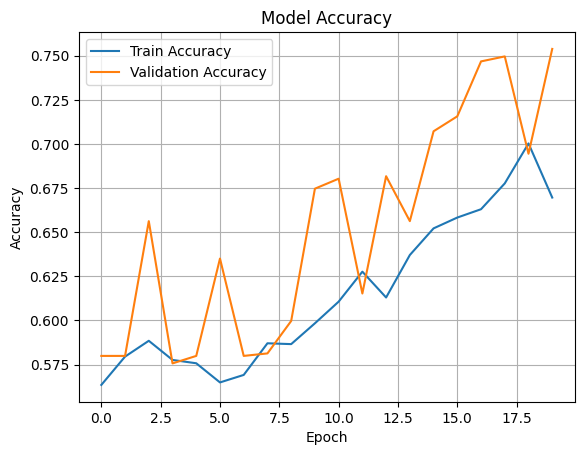

In [86]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.subplot()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)



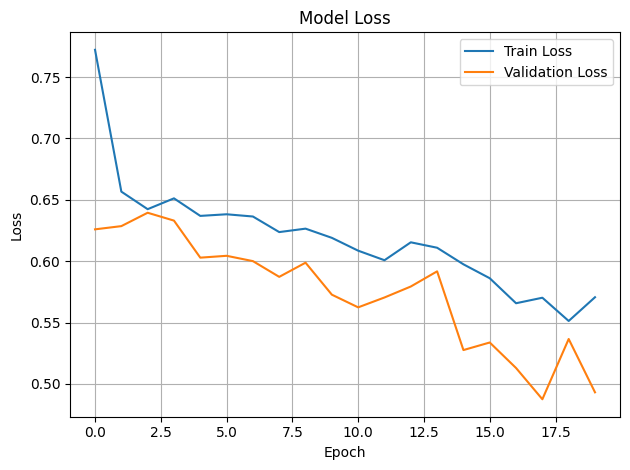

In [87]:
# Loss plot
plt.subplot()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [88]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for all datasets
print("Getting predictions...")

# Training set
y_train_pred_probs = model_cnn.predict(X_train_img)
y_train_pred = (y_train_pred_probs > 0.5).astype(int).flatten()
train_accuracy = np.mean(y_train_pred == y_train_img)

# Validation set
y_val_pred_probs = model_cnn.predict(X_val_img)
y_val_pred = (y_val_pred_probs > 0.5).astype(int).flatten()
val_accuracy = np.mean(y_val_pred == y_val_img)

# Test set
y_test_pred_probs = model_cnn.predict(X_test_img)
y_test_pred = (y_test_pred_probs > 0.5).astype(int).flatten()
test_accuracy = np.mean(y_test_pred == y_test_img)

print("✅ Predictions complete!")

Getting predictions...
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step
✅ Predictions complete!


In [89]:
print("\n" + "=" * 80)
print("📊 ACCURACY COMPARISON")
print("=" * 80)

print(f"\nTraining Set:   {train_accuracy:.2%}  (Seen during training)")
print(f"Validation Set: {val_accuracy:.2%}  (Monitored during training)")
print(f"Test Set:       {test_accuracy:.2%}  REAL ACCURACY")

print(f"\nDataset Sizes:")
print(f"  Training:   {len(X_train_img)} images")
print(f"  Validation: {len(X_val_img)} images")
print(f"  Test:       {len(X_test_img)} images")
print("\n" + "=" * 80)



📊 ACCURACY COMPARISON

Training Set:   69.75%  (Seen during training)
Validation Set: 74.96%  (Monitored during training)
Test Set:       73.41%  REAL ACCURACY

Dataset Sizes:
  Training:   2119 images
  Validation: 707 images
  Test:       707 images



In [90]:
prob_tabular = model_tabular.predict_proba(X_test)[:, 1]

# 2. Get probabilities from the Image model (CNN)
# Variable 'X_test_img' contains the preprocessed test images
prob_img = model_cnn.predict(X_test_img).flatten()

# 3. Average the probabilities for Multi-Modal Fusion
final_prob = (prob_tabular + prob_img) / 2

# 4. Generate final predictions based on the 0.5 threshold
final_pred = (final_prob > 0.5).astype(int)

# 5. Print the Fusion Accuracy using the correct ground truth variable 'y_test_img'
from sklearn.metrics import accuracy_score
print("Final Multi-Modal Fusion Accuracy: ", accuracy_score(y_test, final_pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step
Final Multi-Modal Fusion Accuracy:  0.9321074964639321
